# **3η Εργασία**
Στεβής Χαράλαμπος-Αντώνιος ΑΜ: 1115201600278

In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


# Α' ερώτημα

In [2]:
df=pd.read_csv("/content/drive/MyDrive/nasdaq2007_17.csv", header=None)


df.columns = ['values']
df=df['values'].str.split('\t', expand=True)

Dates = pd.date_range('1/1/2007', periods=3650, freq='d') # Adding dates as index

df= df.set_index([0])
df= df.astype(float)

#Bazw Dates sto dataframe
df_new = df.T
df_new['Dates'] = Dates
df= df_new

In [3]:
#Divide into datasets
training_set = df.iloc[:3000, 1:2].values
test_set = df.iloc[3000:, 1:2].values

In [4]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 3000):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

Δοκιμές έγιναν στα

1.   batch_size -> 1/50/100/500/1000
2.   loss -> mean_squared_error/binary_crossentropy
3.   optimizer -> adam/adamax/sgd/rmsprop

In [5]:
model = Sequential()#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

model.add(Dropout(0.2))# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))

model.add(Dropout(0.2))# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))

model.add(Dropout(0.2))# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))

model.add(Dropout(0.2))# Adding the output layer
model.add(Dense(units = 1))

# Compiling
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting
model.fit(X_train, y_train, epochs = 100, batch_size = 1000)

Epoch 1/100
3/3 [==============================] - 12s 1s/step - loss: 0.1402
Epoch 2/100
3/3 [==============================] - 4s 1s/step - loss: 0.0321
Epoch 3/100
3/3 [==============================] - 4s 1s/step - loss: 0.0258
Epoch 4/100
3/3 [==============================] - 4s 1s/step - loss: 0.0177
Epoch 5/100
3/3 [==============================] - 4s 1s/step - loss: 0.0207
Epoch 6/100
3/3 [==============================] - 4s 1s/step - loss: 0.0098
Epoch 7/100
3/3 [==============================] - 4s 1s/step - loss: 0.0116
Epoch 8/100
3/3 [==============================] - 4s 1s/step - loss: 0.0080
Epoch 9/100
3/3 [==============================] - 4s 1s/step - loss: 0.0070
Epoch 10/100
3/3 [==============================] - 4s 1s/step - loss: 0.0073
Epoch 11/100
3/3 [==============================] - 4s 1s/step - loss: 0.0048
Epoch 12/100
3/3 [==============================] - 4s 1s/step - loss: 0.0057
Epoch 13/100
3/3 [==============================] - 4s 1s/step - loss: 0

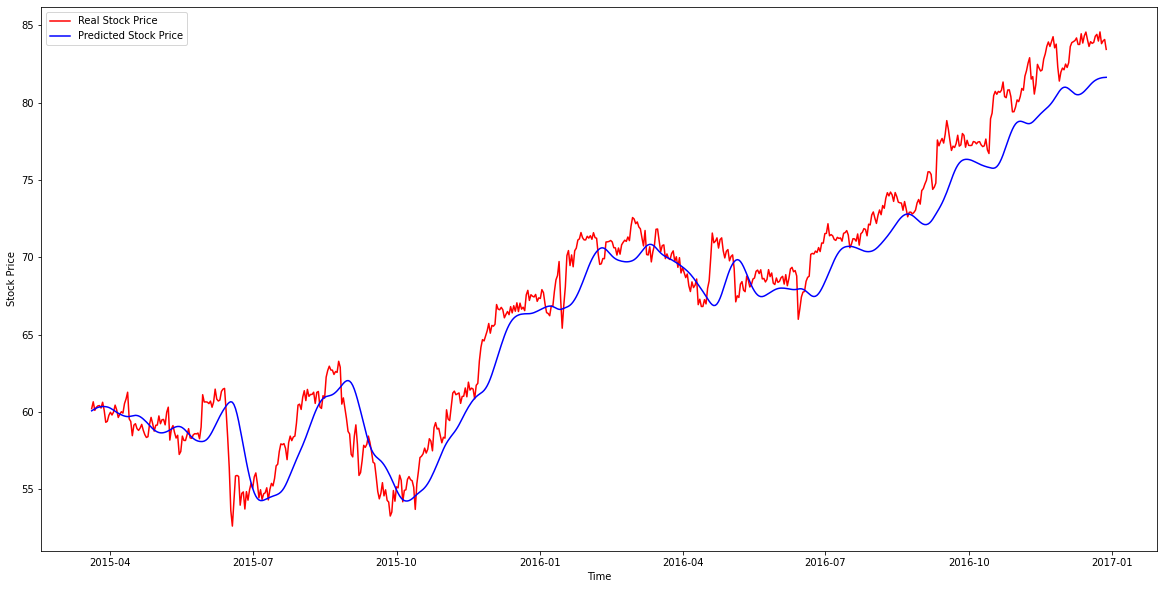

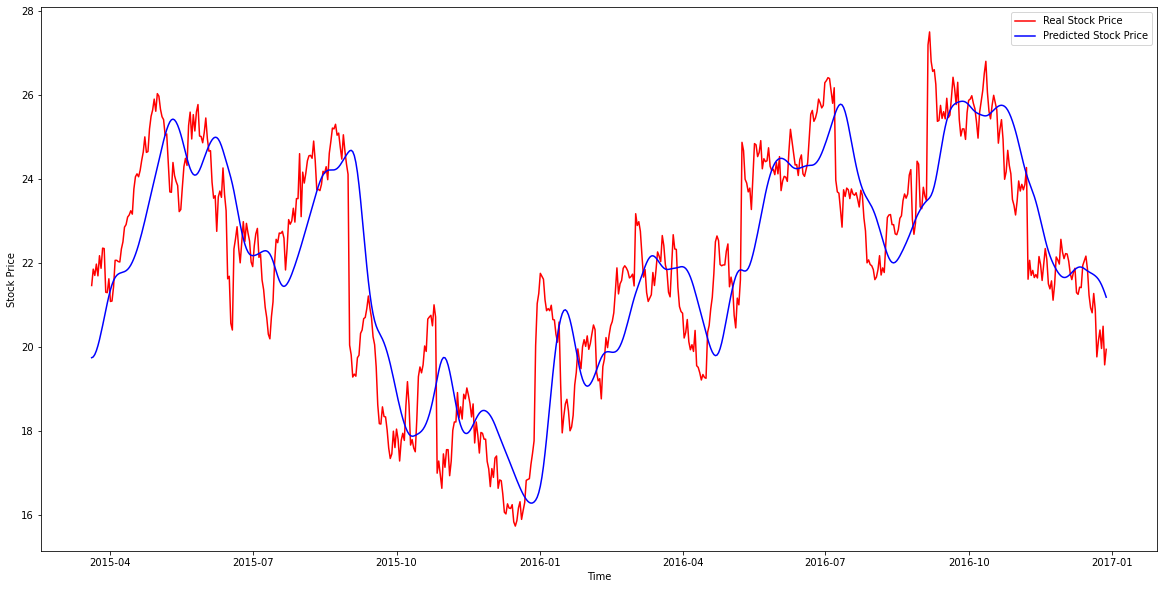

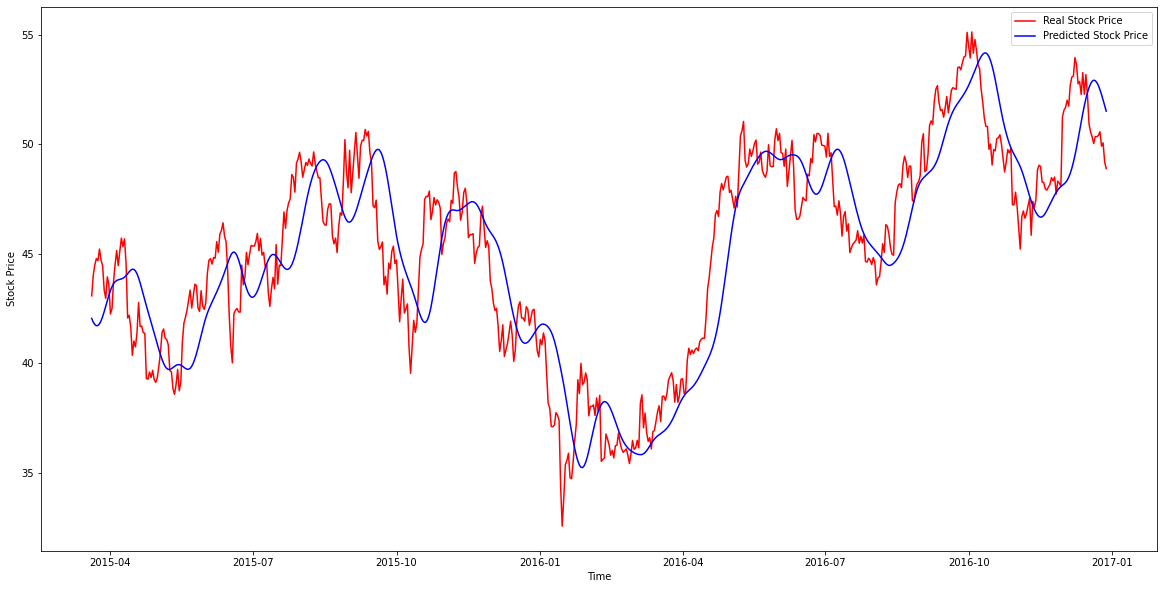

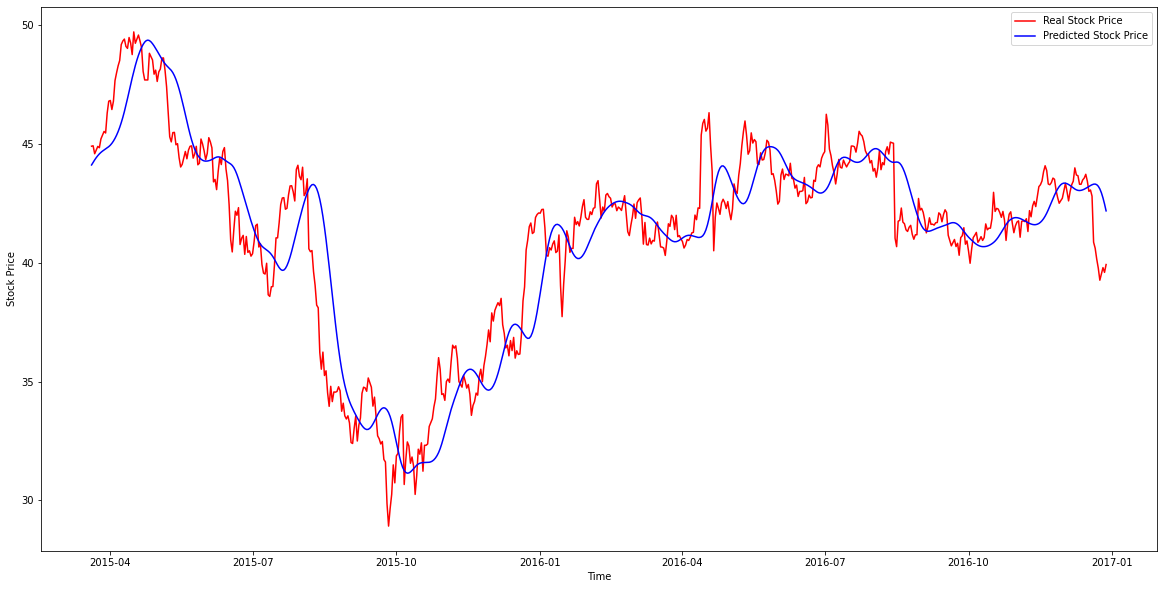

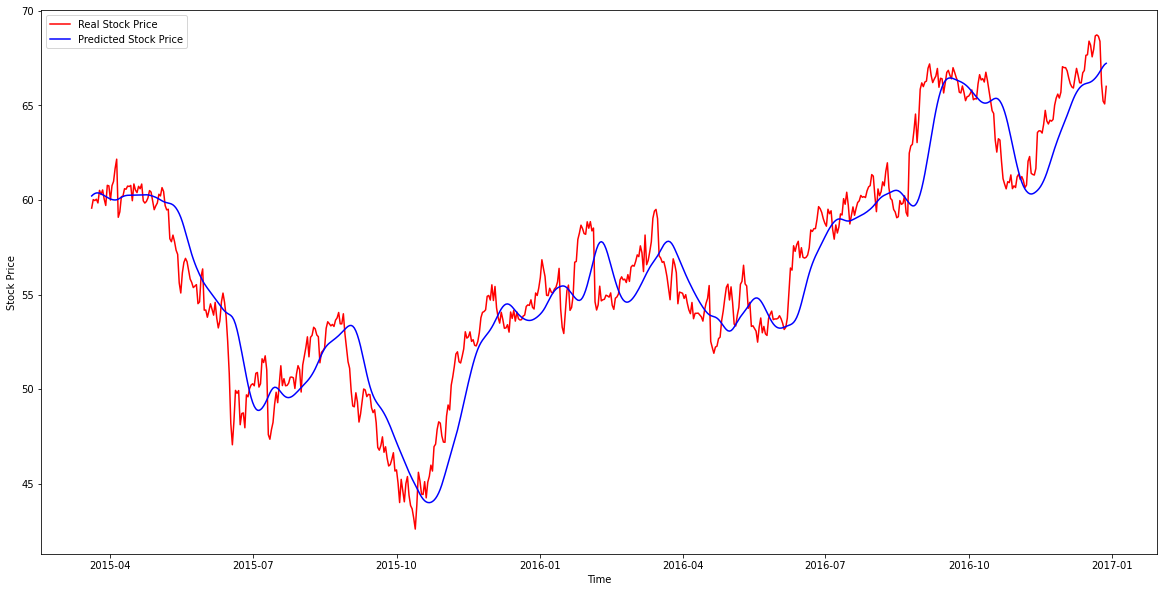

In [6]:
# Getting the predicted stock price for 5 random inputs

from random import seed
from random import randint

seed(1)
for i in range(5):
  value = randint(1, 100)
  dataset_train = df.iloc[:3000, value:(value+1)]
  dataset_test = df.iloc[3000:, value:(value+1)]

  dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
  inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
  inputs = inputs.reshape(-1,1)
  inputs = sc.transform(inputs)
  X_test = []
  for i in range(60, 710):
      X_test.append(inputs[i-60:i, 0])
  X_test = np.array(X_test)
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

  predicted_stock_price = model.predict(X_test)
  predicted_stock_price = sc.inverse_transform(predicted_stock_price)

  # # Visualising the results

  plt.figure(figsize=(20,10))
  plt.plot(df.loc[3001:, 'Dates'],dataset_test.values, color = 'red', label = 'Real Stock Price')
  plt.plot(df.loc[3001:, 'Dates'],predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
  plt.xlabel('Time')
  plt.ylabel('Stock Price')
  plt.legend()
  plt.show()

# Β' ερώτημα

In [7]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler

plt.rcParams["figure.figsize"] = (15, 5)

In [8]:
df_b =df
training_set_b = df_b.iloc[:3000, 1:2].values
test_set_b = df_b.iloc[3000:, 1:2].values


In [ ]:
# scaler = StandardScaler()
# scaler = scaler.fit(training_set_b)

# training_set_b = scaler.transform(training_set_b)
# test_set_b = scaler.transform(test_set_b)


In [10]:
# def create_dataset(X, y, time_steps=1):
#     Xs, ys = [], []
#     for i in range(len(X) - time_steps):
#         v = X.iloc[i:(i + time_steps)].values
#         Xs.append(v)        
#         ys.append(y.iloc[i + time_steps])
#     return np.array(Xs), np.array(ys)

In [11]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set_b)# Creating a data structure with 60 time-steps and 1 output
X_train_b = []
y_train_b = []
for i in range(10, 3000):
    X_train_b.append(training_set_scaled[i-10:i, 0])
    y_train_b.append(training_set_scaled[i, 0])
X_train_b, y_train_b = np.array(X_train_b), np.array(y_train_b)

X_train_b = np.reshape(X_train_b, (X_train_b.shape[0], X_train_b.shape[1], 1))

In [12]:
dataset_train = df_b.iloc[:2990, 0:1]
dataset_test = df_b.iloc[2990:, 0:1]


dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)# Creating a data structure with 10 time-steps and 1 output
inputs = dataset_total[len(dataset_total) - len(dataset_test):].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
inputs = sc.fit_transform(inputs)

X_test_b = []
for i in range(10, 660):
    X_test_b.append(inputs[i-10:i, 0])
X_test_b = np.array(X_test_b)
X_test_b = np.reshape(X_test_b, (X_test_b.shape[0], X_test_b.shape[1], 1))


In [13]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
    units=64, 
    input_shape=(X_train_b.shape[1], X_train_b.shape[2])
))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.RepeatVector(n=X_train_b.shape[1]))
model.add(keras.layers.LSTM(units=64, return_sequences=True))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(units=X_train_b.shape[2])))
model.compile(loss='mae', optimizer='adam')

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.3837 - val_loss: 0.1226
Epoch 2/100
1/1 [==============================] - 1s 720ms/step - loss: 0.3447 - val_loss: 0.1020
Epoch 3/100
1/1 [==============================] - 1s 707ms/step - loss: 0.3167 - val_loss: 0.0897
Epoch 4/100
1/1 [==============================] - 1s 706ms/step - loss: 0.2959 - val_loss: 0.0863
Epoch 5/100
1/1 [==============================] - 1s 687ms/step - loss: 0.2805 - val_loss: 0.0913
Epoch 6/100
1/1 [==============================] - 1s 722ms/step - loss: 0.2738 - val_loss: 0.1036
Epoch 7/100
1/1 [==============================] - 1s 714ms/step - loss: 0.2788 - val_loss: 0.1144
Epoch 8/100
1/1 [==============================] - 1s 689ms/step - loss: 0.2847 - val_loss: 0.1188
Epoch 9/100
1/1 [==============================] - 1s 691ms/step - loss: 0.2838 - val_loss: 0.1177
Epoch 10/100
1/1 [==============================] - 1s 713ms/step - loss: 0.2780 - val_loss: 0.1132
Epoch 11/100

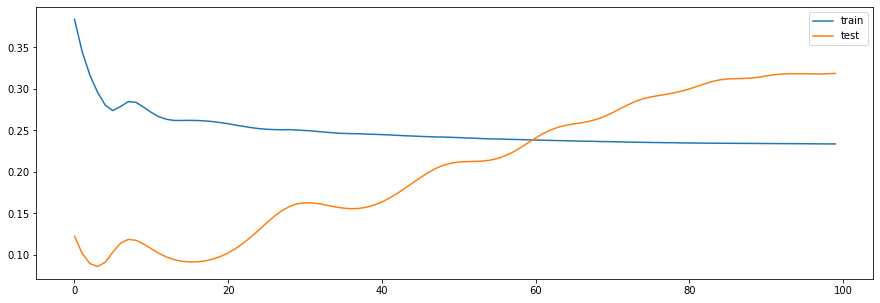

In [14]:
history = model.fit(
    X_train_b, y_train_b,
    epochs=100,
    batch_size=3000,
    validation_split=0.2,
    shuffle=False
)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



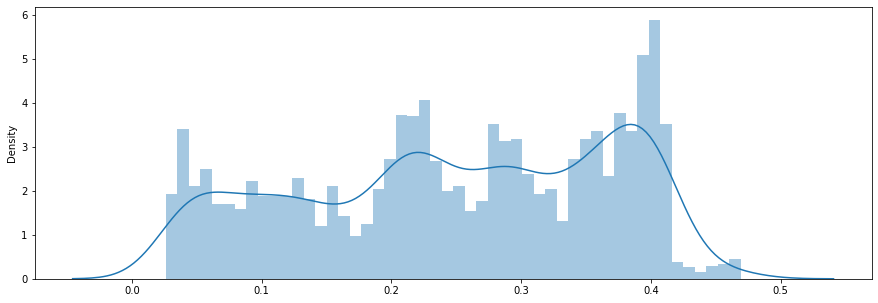

In [15]:
X_train_pred = model.predict(X_train_b)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train_b), axis=1)

sns.distplot(train_mae_loss, bins=50, kde=True);

In [16]:
X_test_pred = model.predict(X_test_b)

test_mae_loss = np.mean(np.abs(X_test_pred - X_test_b), axis=1)


In [17]:
THRESHOLD = 0.4

test_set_b = pd.DataFrame(test_set_b)
Dates_b = pd.date_range('1/1/2007', periods=650, freq='d')
test_set_b['Dates'] = Dates_b
test_set_b.set_index(['Dates'], inplace=True)

test_score_df = pd.DataFrame(index=test_set_b.index)
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = THRESHOLD
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
test_score_df['close'] = test_set_b.values


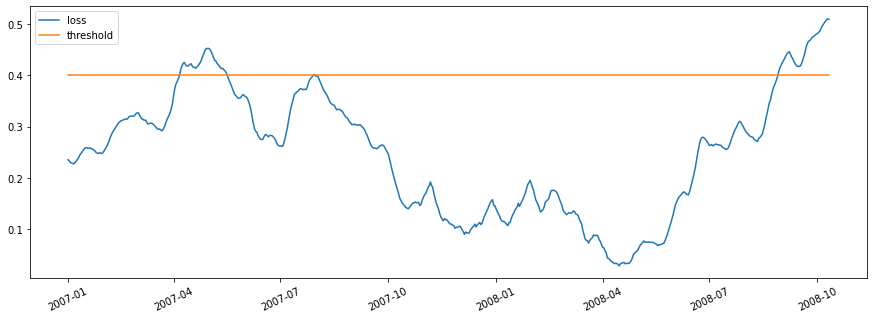

In [18]:
plt.plot(test_score_df.index, test_score_df.loss, label='loss')
plt.plot(test_score_df.index, test_score_df.threshold, label='threshold')
plt.xticks(rotation=25)
plt.legend();

In [19]:
anomalies = test_score_df[test_score_df.anomaly == True]

anomalies_close = []
anomalies_close = anomalies.close
anomalies_close = np.array(anomalies_close)
anomalies_close = np.reshape(anomalies_close, (anomalies_close.shape[0],1))

anomalies.head()

,loss,threshold,anomaly,close
Dates,,,,
2007-04-07,0.410801,0.4,True,20.442
2007-04-08,0.418013,0.4,True,20.989
2007-04-09,0.422335,0.4,True,20.815
2007-04-10,0.425478,0.4,True,21.318
2007-04-11,0.421348,0.4,True,20.989


In [42]:

# plt.rcParams["figure.figsize"] = (15, 5)

# plt.plot(
#   test_set_b[60:].index, 
#   scaler.inverse_transform(test_set_b[60:].values), 
#   label='close price'
# );


# sns.scatterplot(
#   anomalies.index,
#   scaler.inverse_transform(anomalies.close.values),
#   color=sns.color_palette()[3],
#   s=52,
#   label='anomaly'
# )
# plt.xticks(rotation=25)
# plt.legend();


# Γ' ερώτημα

In [21]:
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D, BatchNormalization, LSTM, RepeatVector
from keras.models import Model
from keras.models import model_from_json
from keras import regularizers
import datetime
import time
import requests as req
import json
import pandas as pd
import pickle
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['maximum', 'randint', 'minimum', 'concatenate', 'average', 'dot', 'multiply', 'add', 'seed', 'subtract']
`%matplotlib` prevents importing * from pylab and numpy



Φτιάχνουμε τα databases ώστε να είναι συμβατά με το πρόβλημα

In [22]:
#Train

# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)# Creating a data structure with 20 time-steps and 1 output
X_train_c = []
y_train_c = []
for i in range(20, 3000):
    X_train_c.append(training_set_scaled[i-20:i, 0])
    y_train_c.append(training_set_scaled[i, 0])
X_train_c, y_train_c = np.array(X_train_c), np.array(y_train_c)

X_train_c = np.reshape(X_train_c, (X_train_c.shape[0], X_train_c.shape[1]))

In [23]:
#Test

dataset_train = df.iloc[:3000, 0:1]
dataset_test = df.iloc[3000:, 0:1]

dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 20:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test_c = []
for i in range(20, 660):
    X_test_c.append(inputs[i-20:i, 0])
X_test_c = np.array(X_test_c)
X_test_c = np.reshape(X_test_c, (X_test_c.shape[0], X_test_c.shape[1]))

Δοκιμές έγιναν στα:

1.    epochs -> 10/100/300
2. encoding_dim -> 3/10
3. test_samples -> 10/100/200/600
4. window_length -> 1/10/30/50



In [24]:
#Variables

startdate="01/01/2007"
window_length = 20
encoding_dim = 10
epochs = 100
test_samples = 500

Αλλαγές στο Χ του enumerate(list(np.arange(0, test_samples, Χ))) έδειξαν βελτιώσεις στο output

In [25]:
def mkdate(ts):
    return datetime.datetime.fromtimestamp(
        int(ts)
    ).strftime('%Y-%m-%d')

def plot_examples(stock_input, stock_decoded):
    n = 10  
    plt.figure(figsize=(20, 4))
    for i, idx in enumerate(list(np.arange(0, test_samples, 50))):
        # display original
        ax = plt.subplot(2, n, i + 1)
        if i == 0:
            ax.set_ylabel("Input", fontweight=600)
        else:
            ax.get_yaxis().set_visible(False)
        plt.plot(stock_input[idx])
        ax.get_xaxis().set_visible(False)
        

        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        if i == 0:
            ax.set_ylabel("Output", fontweight=600)
        else:
            ax.get_yaxis().set_visible(False)
        plt.plot(stock_decoded[idx])
        ax.get_xaxis().set_visible(False)
        
        
def plot_history(history):
    plt.figure(figsize=(15, 5))
    ax = plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"])
    plt.title("Train loss")
    ax = plt.subplot(1, 2, 2)
    plt.plot(history.history["val_loss"])
    plt.title("Test loss")

**Simple feed-forward autoencoder**

Δοκιμές έγιναν στα

1.   batch_size -> 1/50/100/500/1000
2.   loss -> mean_squared_error/binary_crossentropy



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 20)                220       
                                                                 
Total params: 430
Trainable params: 430
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
298/298 [==============================] - 1s 2ms/step - loss: 0.0594 - val_loss: 0.0085
Epoch 2/100
298/298 [==============================] - 1s 2ms/step - loss: 0.0100 - val_loss: 3.6051e-04
Epoch 3/100
298/298 [==============================] - 1s 2ms/step - loss: 0.0015 - val_loss: 7.7063e-04
Epoch 4/100
298/

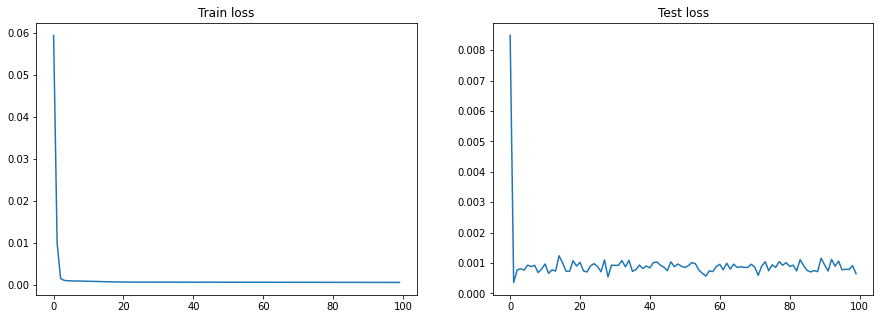

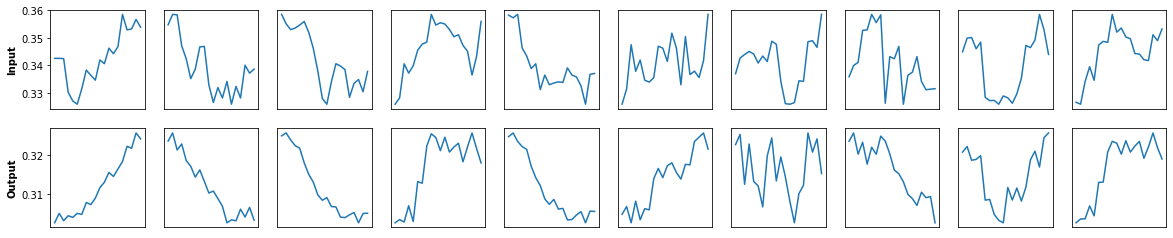

In [26]:
x_train_simple = X_train_c.reshape((len(X_train_c), np.prod(X_train_c.shape[1:])))
x_test_simple = X_test_c.reshape((len(X_test_c), np.prod(X_test_c.shape[1:])))

# this is our input placeholder
input_window = Input(shape=(window_length,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_window)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(window_length, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_window, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_window, encoded)


autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
history = autoencoder.fit(x_train_simple, x_train_simple,
                epochs=epochs,
                batch_size=10,
                shuffle=True,
                validation_data=(x_test_simple, x_test_simple))

decoded_stocks_1 = autoencoder.predict(x_test_simple)

plot_history(history)
plot_examples(x_test_simple, decoded_stocks_1)

Αποθήκευση των predicted τιμών για το Δ ερώτημα

In [27]:
decoded_stocks_1 = pd.DataFrame(decoded_stocks_1)

import random

def generate(unique):
    chars = "abcdefghijklmnopqrstuvwxyz1234567890"
    while True:
        value = "".join(random.choice(chars) for _ in range(4))
        if value not in unique:
            unique.add(value)
            break

unique = set()
for _ in range(640):
    generate(unique)


decoded_stocks_1.rename({0: 1,1: 2,2: 3,3: 4,4: 5,5: 6,6: 7,7: 8,8: 9,9: 10}, axis=1,inplace=True)
decoded_stocks_1.insert(0, 'index', unique)
decoded_stocks_1.rename({'index': 0}, axis=1, inplace=True)


df_new2 = decoded_stocks_1[decoded_stocks_1.columns[0:]].apply(
    lambda x: '\t'.join(x.dropna().astype(str)),
    axis=1
)


df_new2 = pd.DataFrame(df_new2,columns=[0])
df_new2.to_csv('Simple_feed_forward.csv',index=False,header=False)
del df_new2

**Deep autoencoder**

Δοκιμές έγιναν στα

1.   batch_size -> 1/10/50/60/70/100/500/1000
2.   loss -> mean_squared_error/mean_absolute_error/binary_crossentropy


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_4 (Dense)             (None, 6)                 126       
                                                                 
 batch_normalization (BatchN  (None, 6)                24        
 ormalization)                                                   
                                                                 
 dense_5 (Dense)             (None, 10)                70        
                                                                 
 dense_6 (Dense)             (None, 6)                 66        
                                                                 
 batch_normalization_1 (Batc  (None, 6)                24        
 hNormalization)                                           

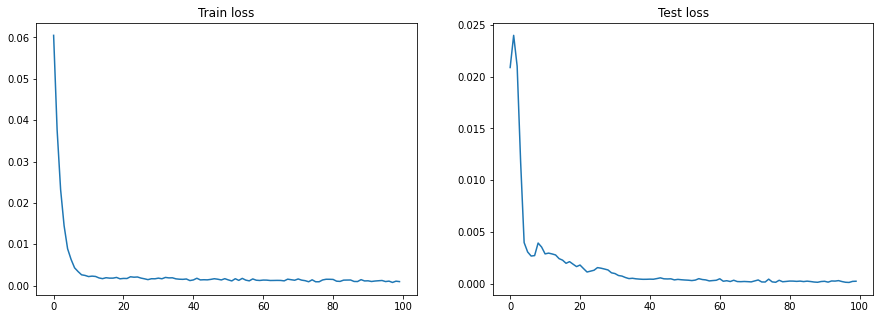

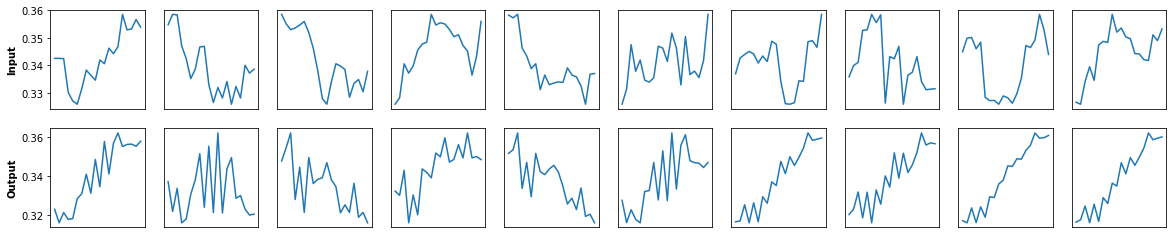

In [28]:
x_train_deep = X_train_c.reshape((len(X_train_c), np.prod(X_train_c.shape[1:])))
x_test_deep = X_test_c.reshape((len(X_test_c), np.prod(X_test_c.shape[1:])))

input_window = Input(shape=(window_length,))

x = Dense(6, activation='relu')(input_window)
x = BatchNormalization()(x)
encoded = Dense(encoding_dim, activation='relu')(x)
# "decoded" is the lossy reconstruction of the input

x = Dense(6, activation='relu')(encoded)
x = BatchNormalization()(x)
decoded = Dense(window_length, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_window, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_window, encoded)

autoencoder.summary()

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
history = autoencoder.fit(x_train_deep, x_train_deep,
                epochs=epochs,
                batch_size=60,
                shuffle=True,
                validation_data=(x_test_deep, x_test_deep))

decoded_stocks_2 = autoencoder.predict(x_test_deep)


plot_history(history)
plot_examples(x_test_deep, decoded_stocks_2)

Αποθήκευση των predicted τιμών για το Δ ερώτημα

In [29]:
decoded_stocks_2 = pd.DataFrame(decoded_stocks_2)

import random

def generate(unique):
    chars = "abcdefghijklmnopqrstuvwxyz1234567890"
    while True:
        value = "".join(random.choice(chars) for _ in range(4))
        if value not in unique:
            unique.add(value)
            break

unique = set()
for _ in range(640):
    generate(unique)


decoded_stocks_2.rename({0: 1,1: 2,2: 3,3: 4,4: 5,5: 6,6: 7,7: 8,8: 9,9: 10}, axis=1,inplace=True)
decoded_stocks_2.insert(0, 'index', unique)
decoded_stocks_2.rename({'index': 0}, axis=1, inplace=True)


df_new2 = decoded_stocks_2[decoded_stocks_2.columns[0:]].apply(
    lambda x: '\t'.join(x.dropna().astype(str)),
    axis=1
)


df_new2 = pd.DataFrame(df_new2,columns=[0])
df_new2.to_csv('Deep_autoencoder.csv',index=False,header=False)
del df_new2

**1D Convolutional autoencoder**

Δοκιμές έγιναν στα

1.   batch_size -> 1/10/50/60/70/100/120/150
2.   loss -> mean_squared_error/mean_absolute_error/binary_crossentropy

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 20, 16)            64        
                                                                 
 batch_normalization_2 (Batc  (None, 20, 16)           64        
 hNormalization)                                                 
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 16)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 1)             49        
                                                                 
 batch_normalization_3 (Batc  (None, 10, 1)            4   

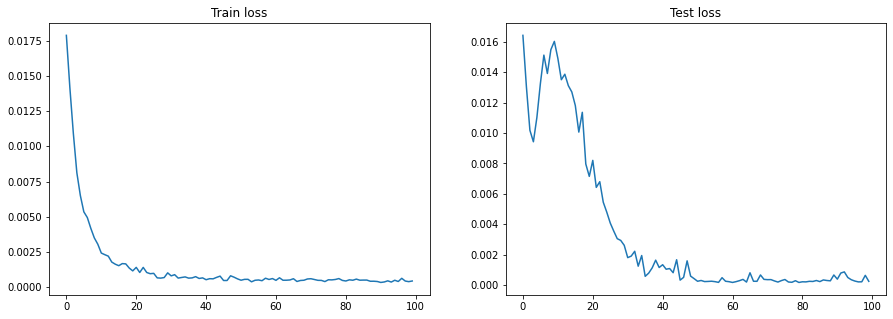

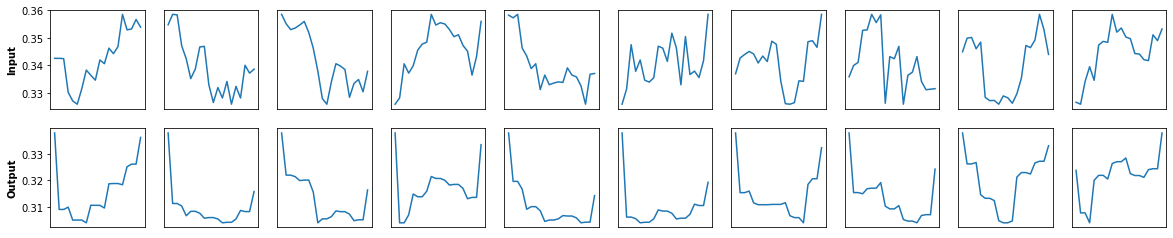

In [30]:
x_train_1d = X_train_c.reshape((len(X_train_c), np.prod(X_train_c.shape[1:])))
x_test_1d = X_test_c.reshape((len(X_test_c), np.prod(X_test_c.shape[1:])))

input_window = Input(shape=(window_length,1))
x = Conv1D(16, 3, activation="relu", padding="same")(input_window) # 10 dims
x = BatchNormalization()(x)
x = MaxPooling1D(2, padding="same")(x) # 5 dims
x = Conv1D(1, 3, activation="relu", padding="same")(x) # 5 dims
x = BatchNormalization()(x)
encoded = MaxPooling1D(2, padding="same")(x) # 3 dims

encoder = Model(input_window, encoded)

# 3 dimensions in the encoded layer

x = Conv1D(1, 3, activation="relu", padding="same")(encoded) # 3 dims
x = BatchNormalization()(x)
x = UpSampling1D(2)(x) # 6 dims
x = Conv1D(16, 1, activation='relu')(x) # 5 dims
x = BatchNormalization()(x)
x = UpSampling1D(2)(x) # 10 dims
decoded = Conv1D(1, 3, activation='sigmoid', padding='same')(x) # 10 dims
autoencoder = Model(input_window, decoded)
autoencoder.summary()

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
history = autoencoder.fit(x_train_1d, x_train_1d,
                epochs=epochs,
                batch_size=150,
                shuffle=True,
                validation_data=(x_test_1d, x_test_1d))

decoded_stocks_3 = autoencoder.predict(x_test_1d)

plot_history(history)
plot_examples(x_test_1d, decoded_stocks_3)

In [31]:
decoded_stocks_3= decoded_stocks_3.reshape(640,20)
decoded_stocks_3 = pd.DataFrame(decoded_stocks_3)

import random

def generate(unique):
    chars = "abcdefghijklmnopqrstuvwxyz1234567890"
    while True:
        value = "".join(random.choice(chars) for _ in range(4))
        if value not in unique:
            unique.add(value)
            break

unique = set()
for _ in range(640):
    generate(unique)


decoded_stocks_3.rename({0: 1,1: 2,2: 3,3: 4,4: 5,5: 6,6: 7,7: 8,8: 9,9: 10}, axis=1,inplace=True)
decoded_stocks_3.insert(0, 'index', unique)
decoded_stocks_3.rename({'index': 0}, axis=1, inplace=True)


df_new2 = decoded_stocks_3[decoded_stocks_3.columns[0:]].apply(
    lambda x: '\t'.join(x.dropna().astype(str)),
    axis=1
)


df_new2 = pd.DataFrame(df_new2,columns=[0])
df_new2.to_csv('1D_Convolutional_autoencoder.csv',index=False,header=False)
del df_new2

**LSTM (recurrent neural networks) autoencoder**

Δοκιμές έγιναν στα

1.   batch_size -> 1/10/50/60/70/100/120/150/1000/3000
2.   loss -> mean_squared_error/mean_absolute_error/binary_crossentropy

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 20, 1)]           0         
                                                                 
 lstm_6 (LSTM)               (None, 10)                480       
                                                                 
 repeat_vector_1 (RepeatVect  (None, 20, 10)           0         
 or)                                                             
                                                                 
 lstm_7 (LSTM)               (None, 20, 1)             48        
                                                                 
Total params: 528
Trainable params: 528
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
60/60 [==============================] - 5s 34ms/step - loss: 0.2183 - val_loss: 0.1547
Epoch 2/100
60/60 [========

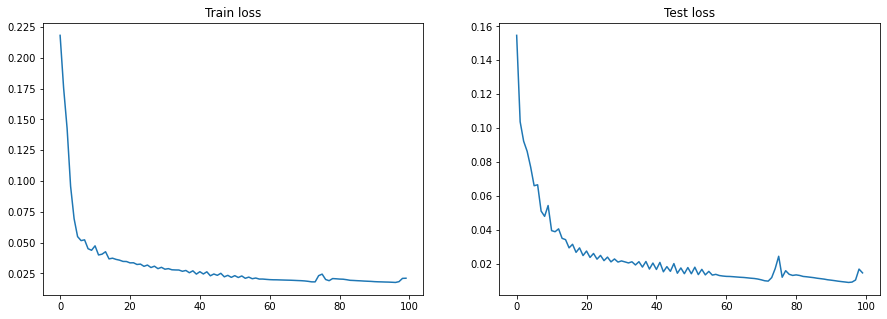

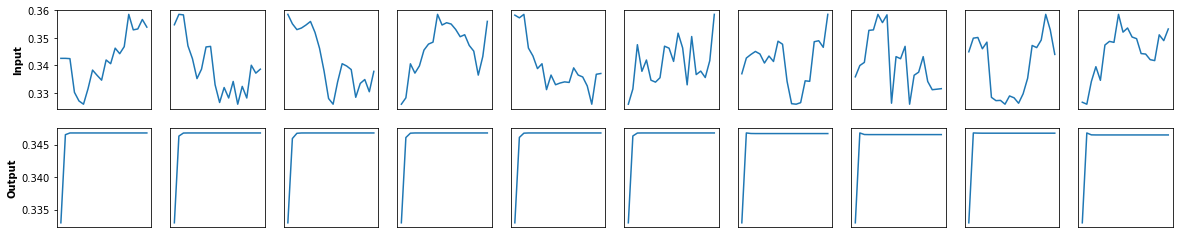

In [32]:
inputs = Input(shape=(window_length, 1))
encoded = LSTM(encoding_dim)(inputs)

decoded = RepeatVector(window_length)(encoded)
decoded = LSTM(1, return_sequences=True)(decoded)

sequence_autoencoder = Model(inputs, decoded)
encoder = Model(inputs, encoded)
sequence_autoencoder.summary()

sequence_autoencoder.compile(optimizer='adam', loss='mean_absolute_error')
history = sequence_autoencoder.fit(X_train_c, X_train_c,
                epochs=epochs,
                batch_size=50,
                shuffle=False,
                validation_data=(X_test_c, X_test_c))

decoded_stocks_4 = sequence_autoencoder.predict(X_test_c)

plot_history(history)
plot_examples(X_test_c, decoded_stocks_4)

Αποθήκευση των predicted τιμών για το Δ ερώτημα

In [33]:
decoded_stocks_4= decoded_stocks_4.reshape(640,20)
decoded_stocks_4 = pd.DataFrame(decoded_stocks_4)

import random

def generate(unique):
    chars = "abcdefghijklmnopqrstuvwxyz1234567890"
    while True:
        value = "".join(random.choice(chars) for _ in range(4))
        if value not in unique:
            unique.add(value)
            break

unique = set()
for _ in range(640):
    generate(unique)


decoded_stocks_4.rename({0: 1,1: 2,2: 3,3: 4,4: 5,5: 6,6: 7,7: 8,8: 9,9: 10}, axis=1,inplace=True)
decoded_stocks_4.insert(0, 'index', unique)
decoded_stocks_4.rename({'index': 0}, axis=1, inplace=True)


df_new2 = decoded_stocks_4[decoded_stocks_4.columns[0:]].apply(
    lambda x: '\t'.join(x.dropna().astype(str)),
    axis=1
)


df_new2 = pd.DataFrame(df_new2,columns=[0])
df_new2.to_csv('LSTM.csv',index=False,header=False)

**Simple AE + augmention with synthetic data**

Δοκιμές έγιναν στα

1.   batch_size -> 100/120/150/1000/1500/2000/4000
2.   loss -> mean_squared_error/mean_absolute_error/binary_crossentropy

In [34]:
synthesized = []
required_nums = [0, 1]
optional_nums = list(np.arange(0.1, 0.9, 0.1))
for i in tqdm(range(100000)):
    combo = list(np.random.choice(optional_nums, 8))+required_nums
    np.random.shuffle(combo)
    synthesized.append(combo)

100%|██████████| 100000/100000 [00:04<00:00, 21952.48it/s]


In [35]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)# Creating a data structure with 10 time-steps and 1 output
X_train_c = []
y_train_c = []
for i in range(10, 3000):
    X_train_c.append(training_set_scaled[i-10:i, 0])
    y_train_c.append(training_set_scaled[i, 0])
X_train_c, y_train_c = np.array(X_train_c), np.array(y_train_c)

X_train_c = np.reshape(X_train_c, (X_train_c.shape[0], X_train_c.shape[1], 1))


In [36]:
dataset_train = df.iloc[:3000, 0:1]
dataset_test = df.iloc[3000:, 0:1]

dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 10:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test_c = []
for i in range(10, 660):
    X_test_c.append(inputs[i-10:i, 0])
X_test_c = np.array(X_test_c)
X_test_c = np.reshape(X_test_c, (X_test_c.shape[0], X_test_c.shape[1], 1))

In [37]:
startdate="01/01/2007"
window_length = 10
encoding_dim = 3
epochs = 100
test_samples = 500

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_8 (Dense)             (None, 3)                 33        
                                                                 
 dense_9 (Dense)             (None, 10)                40        
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
52/52 [==============================] - 1s 5ms/step - loss: 0.0986 - val_loss: 0.0188
Epoch 2/100
52/52 [==============================] - 0s 3ms/step - loss: 0.0946 - val_loss: 0.0172
Epoch 3/100
52/52 [==============================] - 0s 3ms/step - loss: 0.0921 - val_loss: 0.0161
Epoch 4/100
52/52 [===========

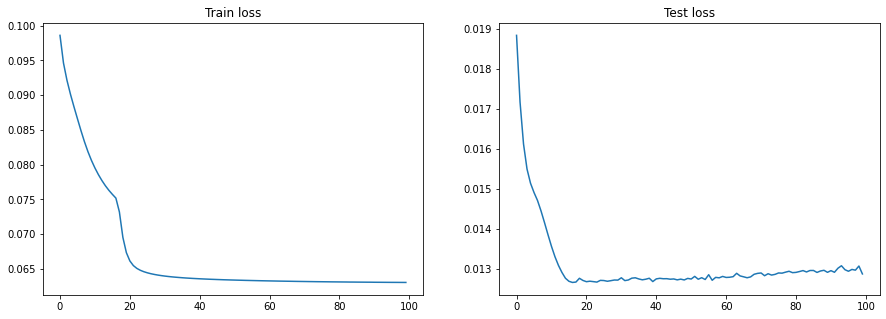

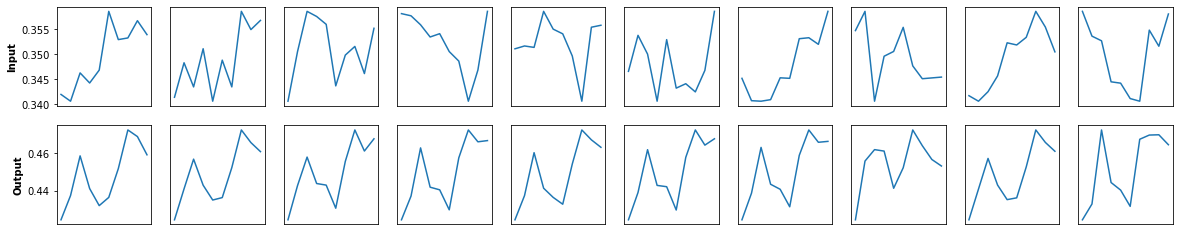

In [38]:
x_train_simple = np.concatenate((X_train_c.reshape((len(X_train_c), np.prod(X_train_c.shape[1:]))),synthesized))
x_test_simple = X_test_c.reshape((len(X_test_c), np.prod(X_test_c.shape[1:])))


input_window = Input(shape=(window_length,))
encoded = Dense(encoding_dim, activation='relu')(input_window)
decoded = Dense(window_length, activation='sigmoid')(encoded)
autoencoder = Model(input_window, decoded)
encoder = Model(input_window, encoded)


autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
history = autoencoder.fit(x_train_simple, x_train_simple,
                epochs=epochs,
                batch_size=2000,
                shuffle=True,
                validation_data=(x_test_simple, x_test_simple))

decoded_stocks_5 = autoencoder.predict(x_test_simple)

plot_history(history)
plot_examples(x_test_simple, decoded_stocks_5)

Αποθήκευση των predicted τιμών για το Δ ερώτημα

In [39]:
decoded_stocks_5 = pd.DataFrame(decoded_stocks_5)

import random

def generate(unique):
    chars = "abcdefghijklmnopqrstuvwxyz1234567890"
    while True:
        value = "".join(random.choice(chars) for _ in range(4))
        if value not in unique:
            unique.add(value)
            break

unique = set()
for _ in range(650):
    generate(unique)


decoded_stocks_5.rename({0: 1,1: 2,2: 3,3: 4,4: 5,5: 6,6: 7,7: 8,8: 9,9: 10}, axis=1,inplace=True)
decoded_stocks_5.insert(0, 'index', unique)
decoded_stocks_5.rename({'index': 0}, axis=1, inplace=True)


df_new2 = decoded_stocks_5[decoded_stocks_5.columns[0:]].apply(
    lambda x: '\t'.join(x.dropna().astype(str)),
    axis=1
)


df_new2 = pd.DataFrame(df_new2,columns=[0])
df_new2.to_csv('Simple_AE.csv',index=False,header=False)

**Deep autoencoder + synthetic data**

Δοκιμές έγιναν στα

1.   batch_size -> 100/120/150/1000/1500/2000/4000/5000/6000/7000
2.   loss -> mean_squared_error/mean_absolute_error/binary_crossentropy

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_10 (Dense)            (None, 6)                 66        
                                                                 
 batch_normalization_6 (Batc  (None, 6)                24        
 hNormalization)                                                 
                                                                 
 dense_11 (Dense)            (None, 3)                 21        
                                                                 
 dense_12 (Dense)            (None, 6)                 24        
                                                                 
 batch_normalization_7 (Batc  (None, 6)                24        
 hNormalization)                                          

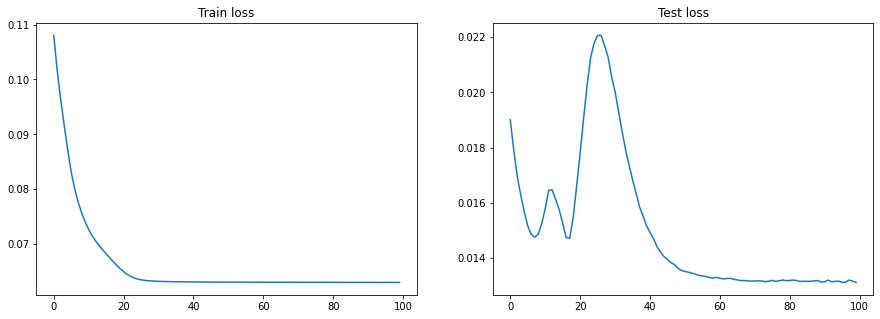

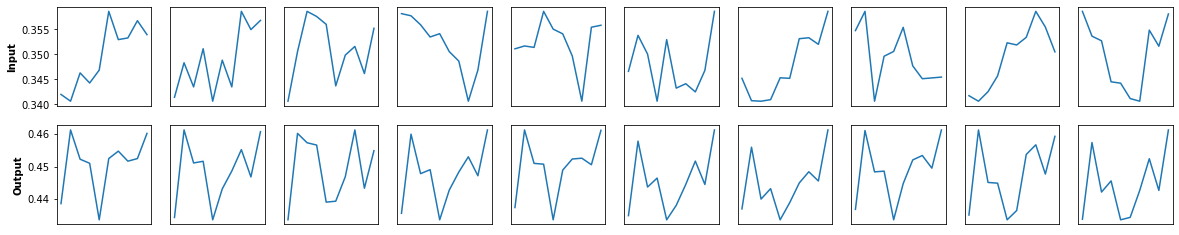

In [40]:
x_train_deep = np.concatenate((X_train_c.reshape((len(X_train_c), np.prod(X_train_c.shape[1:]))),synthesized))
x_test_deep = X_test_c.reshape((len(X_test_c), np.prod(X_test_c.shape[1:])))
input_window = Input(shape=(window_length,))

x = Dense(6, activation='relu')(input_window)
x = BatchNormalization()(x)
encoded = Dense(encoding_dim, activation='relu')(x)
x = Dense(6, activation='relu')(encoded)
x = BatchNormalization()(x)
decoded = Dense(window_length, activation='sigmoid')(x)
autoencoder = Model(input_window, decoded)

autoencoder.summary()

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
history = autoencoder.fit(x_train_deep, x_train_deep,
                epochs=epochs,
                batch_size=6000,
                shuffle=True,
                validation_data=(x_test_deep, x_test_deep))

decoded_stocks_6 = autoencoder.predict(x_test_deep)

plot_history(history)
plot_examples(x_test_simple, decoded_stocks_6)

Αποθήκευση των predicted τιμών για το Δ ερώτημα

In [41]:
decoded_stocks_6 = pd.DataFrame(decoded_stocks_6)

import random

def generate(unique):
    chars = "abcdefghijklmnopqrstuvwxyz1234567890"
    while True:
        value = "".join(random.choice(chars) for _ in range(4))
        if value not in unique:
            unique.add(value)
            break

unique = set()
for _ in range(650):
    generate(unique)


decoded_stocks_6.rename({0: 1,1: 2,2: 3,3: 4,4: 5,5: 6,6: 7,7: 8,8: 9,9: 10}, axis=1,inplace=True)
decoded_stocks_6.insert(0, 'index', unique)
decoded_stocks_6.rename({'index': 0}, axis=1, inplace=True)


df_new2 = decoded_stocks_6[decoded_stocks_6.columns[0:]].apply(
    lambda x: '\t'.join(x.dropna().astype(str)),
    axis=1
)


df_new2 = pd.DataFrame(df_new2,columns=[0])
df_new2.to_csv('Deep_autoencoder_synthetic_data.csv',index=False,header=False)